In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, TimeSeriesSplit
from xgboost import XGBRegressor

start_date = '2010-01-01'
end_date = '2020-01-01'
dates = pd.date_range(start=start_date, end=end_date, freq='D')
unix_dates = np.array([int(pd.Timestamp(d).timestamp()) for d in dates])
freq = 'D'  # Monthly frequency
date_rng = pd.date_range(start=start_date, end=end_date, freq=freq)
prices = np.sin(unix_dates)
data = pd.DataFrame({'ds': date_rng, 'y': prices})

In [3]:
import xgboost
print(xgboost.__version__)

1.7.6


In [76]:
params = {
    'max_depth': [3, 6, 12, 18],
    'learning_rate': [1e-4, 0.001, 0.01, 0.3],
    'n_estimators': [1, 10, 50, 500],
}

In [77]:
rand_state = 0
model = XGBRegressor(random_state=rand_state)
model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 0,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [78]:
#Prepare data for algorithm by
# converting datetime to a numeric format
X = data[['ds']].values.astype(np.int64)
y = data.y.values

In [79]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = False)

In [91]:
search = GridSearchCV(
    model,
    params,
    n_jobs = -1,
    cv = KFold(n_splits=3, shuffle=True, random_state=rand_state), #with shuffling
    return_train_score = True,
    scoring = 'neg_mean_absolute_error',
    verbose=0,
).fit(X_train, y_train)

In [92]:
cv_results = search.cv_results_

#View the CV results (sorted by test_score)
results_df = (
    pd.DataFrame(cv_results)
    .eval('mean_test_score = -mean_test_score')
    .sort_values('mean_test_score')
)
display(results_df.head(3))

#Get prediction using the best estimator
predictions = search.best_estimator_.predict(X_train)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
55,0.382917,0.008930,0.010083,0.001224,0.3,6,500,"{'learning_rate': 0.3, 'max_depth': 6, 'n_esti...",-0.056815,-0.057947,-0.056758,0.057173,0.000547,1,-0.004464,-0.004719,-0.004336,-0.004506,0.000159
59,0.319026,0.017789,0.008259,0.002307,0.3,12,500,"{'learning_rate': 0.3, 'max_depth': 12, 'n_est...",-0.057149,-0.057944,-0.056978,0.057357,0.000421,2,-0.002440,-0.002258,-0.002170,-0.002289,0.000113
63,0.251481,0.007888,0.007010,0.000404,0.3,18,500,"{'learning_rate': 0.3, 'max_depth': 18, 'n_est...",-0.057341,-0.057948,-0.056875,0.057388,0.000439,3,-0.001610,-0.001869,-0.001890,-0.001789,0.000127


In [93]:
search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [94]:
len(predictions)

3287

In [95]:
len(y)

3653

Text(0, 0.5, 'value')

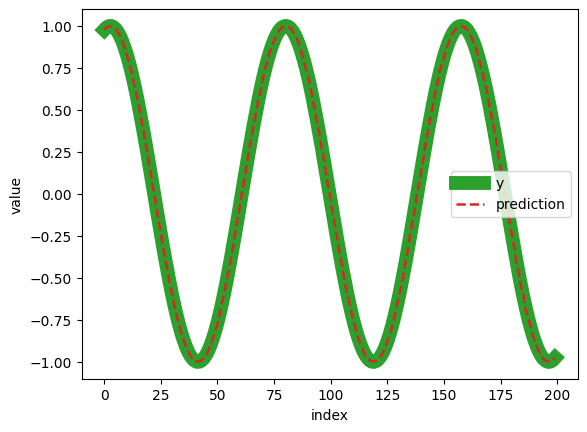

In [96]:
#View the first 100 samples
plt.plot(y[:200], linewidth=10, color='tab:green', label='y')
plt.plot(predictions[:200], color='tab:red', linestyle='--', linewidth=1.8, label='prediction')
plt.legend()
plt.xlabel('index')
plt.ylabel('value')

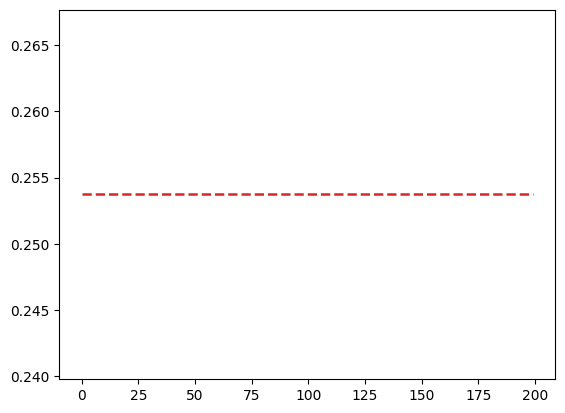

In [74]:

plt.plot(predictions[:200], color='tab:red', linestyle='--', linewidth=1.8, label='prediction')

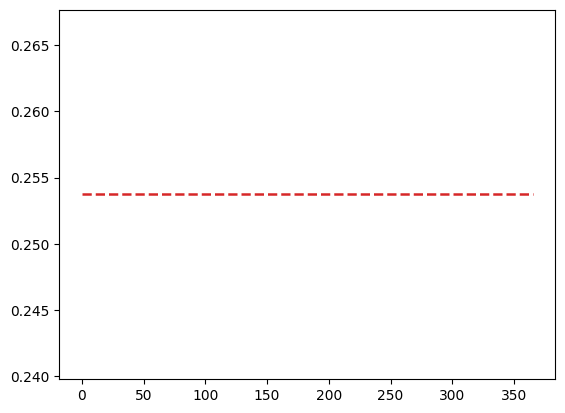

In [75]:
plt.plot(predictions, color='tab:red', linestyle='--', linewidth=1.8, label='prediction')